In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df_3 = pd.read_csv("Sample_3.csv")

df_4 = pd.read_csv("Sample_4.csv")

df_5 = pd.read_csv("Sample_5_corrected.csv")

In [3]:
df_3.drop('chest', axis=1, inplace=True)
df_3.drop('ethnicity', axis=1, inplace=True)
df_3.drop('p_id', axis=1, inplace=True)
df_3.head()

,age,female,grip,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
0,23,0,34.0,1,3,3,1,1,1,3,1,4,1,3,3,3,3,4,1
1,19,0,30.0,4,4,2,1,3,2,4,5,3,4,1,5,4,3,5,3
2,18,1,20.0,4,5,4,5,4,2,2,5,1,2,4,5,2,4,1,1
3,19,0,38.0,2,1,2,3,4,5,4,4,2,5,2,3,4,2,4,4
4,19,0,39.0,3,2,4,2,2,3,4,3,2,1,4,4,4,4,2,3


In [4]:
df_4.drop('p_id', axis=1, inplace=True)
df_4[['age', 'female']] = df_4[['female', 'age']]
df_4.rename(columns={'age': 'temp_column', 'female': 'age'}, inplace=True)
df_4.rename(columns={'temp_column': 'female'}, inplace=True)

df_4.head()

,age,female,grip,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
0,18.0,1,29.32,3.0,5,5,5,3,5,4,5,4.0,2.0,5,5.0,5.0,5,5,5
1,21.0,1,23.55,4.0,4,4,5,4,4,2,3,5.0,4.0,2,3.0,2.0,4,1,3
2,18.0,1,31.18,5.0,2,5,2,2,1,1,4,2.0,1.0,4,4.0,3.0,5,4,2
3,19.0,1,23.91,2.0,4,4,2,2,4,1,4,2.0,5.0,3,5.0,4.0,4,1,2
4,19.0,0,39.09,2.0,4,2,2,2,3,3,2,3.0,4.0,4,4.0,1.0,4,4,3


In [5]:
df_5.drop('ethnicity', axis=1, inplace=True)
df_5.drop('p_id', axis=1, inplace=True)
df_5.head()

,age,female,grip,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
0,18,0,36.40,4,4,2,2,4,2,4,4,2,4,4,2,2,4,3,4
1,20,0,34.24,2,2,4,5,4,2,3,5,5,1,2,5,2,3,5,1
2,18,0,38.86,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,19,0,33.69,4,4,3,3,3,2,3,4,3,5,2,4,2,4,5,2
4,19,0,47.53,2,4,2,4,3,3,4,4,3,4,3,4,3,3,3,3


In [6]:
combined_df = pd.concat([df_3, df_4, df_5], ignore_index=True)
combined_df.head()

,age,female,grip,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
0,23.0,0,34.0,1.0,3,3,1,1,1,3,1,4.0,1.0,3,3.0,3.0,3,4,1
1,19.0,0,30.0,4.0,4,2,1,3,2,4,5,3.0,4.0,1,5.0,4.0,3,5,3
2,18.0,1,20.0,4.0,5,4,5,4,2,2,5,1.0,2.0,4,5.0,2.0,4,1,1
3,19.0,0,38.0,2.0,1,2,3,4,5,4,4,2.0,5.0,2,3.0,4.0,2,4,4
4,19.0,0,39.0,3.0,2,4,2,2,3,4,3,2.0,1.0,4,4.0,4.0,4,2,3


In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1002 non-null   float64
 1   female  1015 non-null   int64  
 2   grip    1015 non-null   float64
 3   hex_5   1013 non-null   float64
 4   hex_11  1015 non-null   int64  
 5   hex_17  1015 non-null   int64  
 6   hex_23  1015 non-null   int64  
 7   hex_29  1015 non-null   int64  
 8   hex_35  1015 non-null   int64  
 9   hex_41  1015 non-null   int64  
 10  hex_47  1015 non-null   int64  
 11  hex_53  1014 non-null   float64
 12  hex_59  1014 non-null   float64
 13  hex_65  1015 non-null   int64  
 14  hex_71  1013 non-null   float64
 15  hex_77  1014 non-null   float64
 16  hex_83  1015 non-null   int64  
 17  hex_89  1015 non-null   int64  
 18  hex_95  1015 non-null   int64  
dtypes: float64(7), int64(12)
memory usage: 150.8 KB


In [8]:
# Handle missing values 
combined_df = combined_df.dropna()
combined_df.shape

(997, 19)

In [9]:
combined_df.describe()

,age,female,grip,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.00000,997.000000,997.000000,997.000000
mean,19.292879,0.553661,29.144002,3.063190,3.925777,3.290873,2.996991,3.076229,2.961886,3.195587,3.705115,3.013039,3.067202,3.600802,3.967904,3.01003,4.138415,3.085256,2.968907
std,1.677419,0.497362,11.914692,1.225162,1.037697,1.150191,1.239814,1.186523,1.305899,1.174897,0.976277,1.141949,1.318884,1.046662,1.000488,1.20153,0.869438,1.263383,1.249111
min,18.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,18.000000,0.000000,20.140000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,4.000000,2.00000,4.000000,2.000000,2.000000
50%,19.000000,1.000000,27.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.00000,4.000000,3.000000,3.000000
75%,20.000000,1.000000,37.360000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.00000,5.000000,4.000000,4.000000
max,38.000000,1.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000


In [10]:
def standardizeData(data):
    from sklearn.preprocessing import MinMaxScaler

    # Create a StandardScaler object
    scaler = MinMaxScaler()

    # Fit the scaler to data 
    scaler.fit(data)

    # Transform data using the scaler to standardize it, return as DataFrame
    return pd.DataFrame(scaler.transform(data))


In [11]:
# Extract the columns corresponding to fearfulness, anxiety, dependence, and sentimentality
fearfulness_columns = [f'hex_{i}' for i in [5, 29, 53, 77]]
anxiety_columns = [f'hex_{i}' for i in [11, 35, 59, 83]]
dependence_columns = [f'hex_{i}' for i in [17, 41, 65, 89]]
sentimentality_columns = [f'hex_{i}' for i in [23, 47, 71, 95]]

# Sum the scores for each dimension
combined_df['Fearfulness_Score'] = combined_df[fearfulness_columns].sum(axis=1)
combined_df['Anxiety_Score'] = combined_df[anxiety_columns].sum(axis=1)
combined_df['Dependence_Score'] = combined_df[dependence_columns].sum(axis=1)
combined_df['Sentimentality_Score'] = combined_df[sentimentality_columns].sum(axis=1)

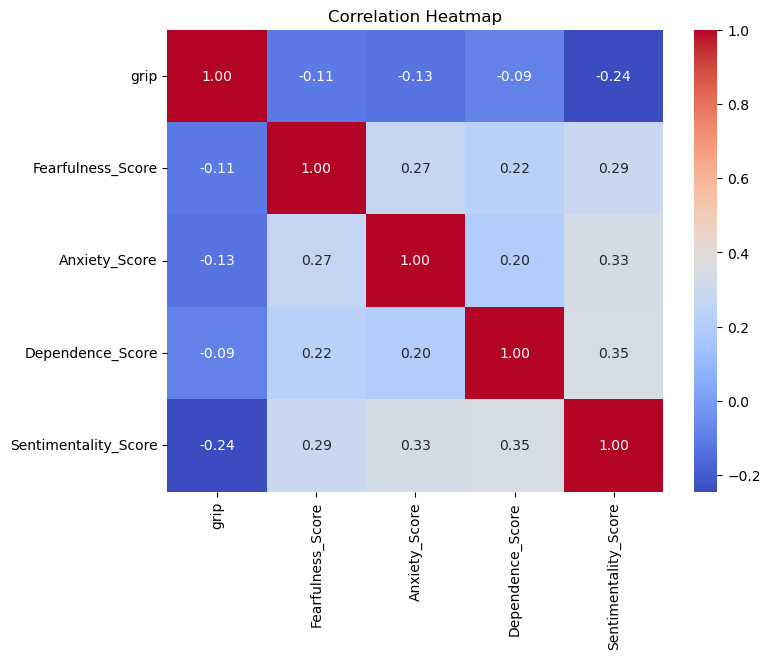

In [12]:
feature_columns = ['Fearfulness_Score', 'Anxiety_Score', 'Dependence_Score', 'Sentimentality_Score']

# Assuming you have a DataFrame named new_df and the specified feature_columns
correlation = combined_df[['grip'] + feature_columns].corr()

# Assuming 'correlation' contains your correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [13]:
X_orig = combined_df.drop("grip", axis = 1)
X_orig = X_orig.drop("female", axis = 1)

y_orig = combined_df["female"]

column_names = X_orig.columns.tolist()

X_orig = standardizeData(X_orig)

X_orig.columns = column_names

X_orig.head()

,age,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,...,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95,Fearfulness_Score,Anxiety_Score,Dependence_Score,Sentimentality_Score
0,0.25,0.00,0.50,0.50,0.00,0.00,0.00,0.50,0.00,0.75,...,0.50,0.50,0.50,0.50,0.75,0.00,0.3125,0.142857,0.5625,0.000000
1,0.05,0.75,0.75,0.25,0.00,0.50,0.25,0.75,1.00,0.50,...,0.00,1.00,0.75,0.50,1.00,0.50,0.6250,0.500000,0.5000,0.571429
2,0.00,0.75,1.00,0.75,1.00,0.75,0.25,0.25,1.00,0.00,...,0.75,1.00,0.25,0.75,0.00,0.00,0.4375,0.500000,0.4375,0.714286
3,0.05,0.25,0.00,0.25,0.50,0.75,1.00,0.75,0.75,0.25,...,0.25,0.50,0.75,0.25,0.75,0.75,0.5000,0.500000,0.5000,0.571429
4,0.05,0.50,0.25,0.75,0.25,0.25,0.50,0.75,0.50,0.25,...,0.75,0.75,0.75,0.75,0.25,0.50,0.4375,0.285714,0.6250,0.428571


In [14]:
def FitRandomForestModel(X, y): 
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Create the model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict target with X_Test
    y_pred = rf_model.predict(X_test)


    # Visualize results
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')


In [15]:
def showFeatureImportances(X): 
    # Get feature importances
    feature_importances = rf_model.feature_importances_

    # Get names of features
    features = list(X.columns)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(y=list(features), x=list(feature_importances), orient='h', palette="viridis")
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importances for predicting grip strength')
    plt.show()

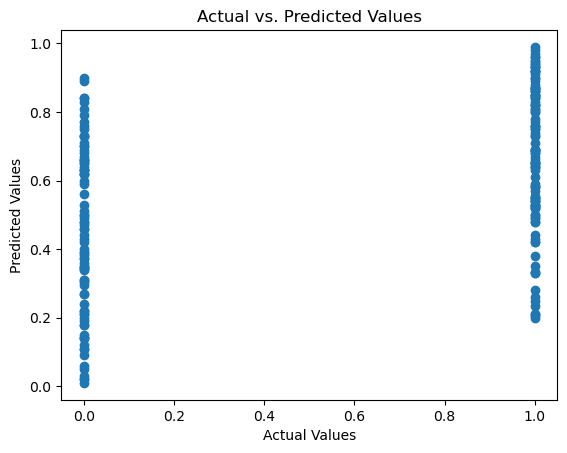

Mean Squared Error: 0.19845977606575965
R-squared: 0.19456259713571578


In [19]:
FitRandomForestModel(X_orig, y_orig)

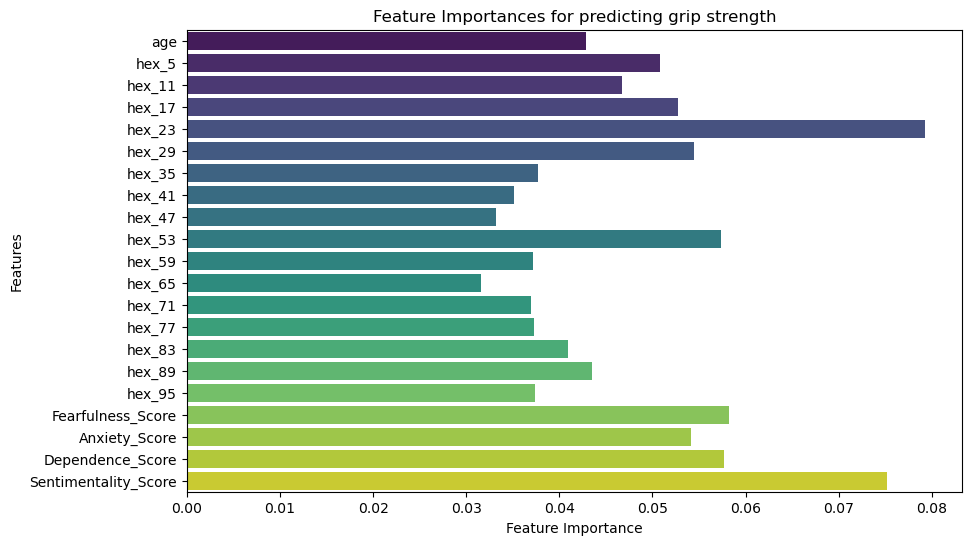

In [17]:
showFeatureImportances(X_orig)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assume y_orig contains labels for classification (e.g., 0 or 1 for binary classification)
# If you have multiple classes, adjust the classifier accordingly (e.g., RandomForestClassifier(n_estimators=100, random_state=42, n_classes=3))
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42)

# Create the model
rf_model = RandomForestClassifier(n_estimators=400, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict target with X_Test
y_pred = rf_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.695
Confusion Matrix:
[[49 39]
 [22 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        88
           1       0.70      0.80      0.75       112

    accuracy                           0.69       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.69      0.69      0.69       200



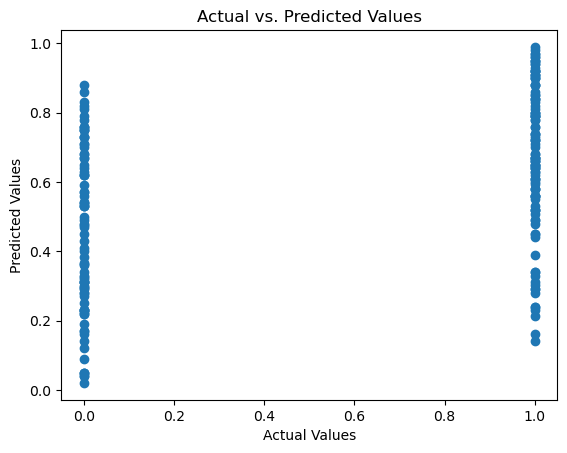

Mean Squared Error: 0.19973816224206353
R-squared: 0.18937434155006694


In [15]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42)


# Create the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict target with X_Test
y_pred = rf_model.predict(X_test)


# Visualize results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

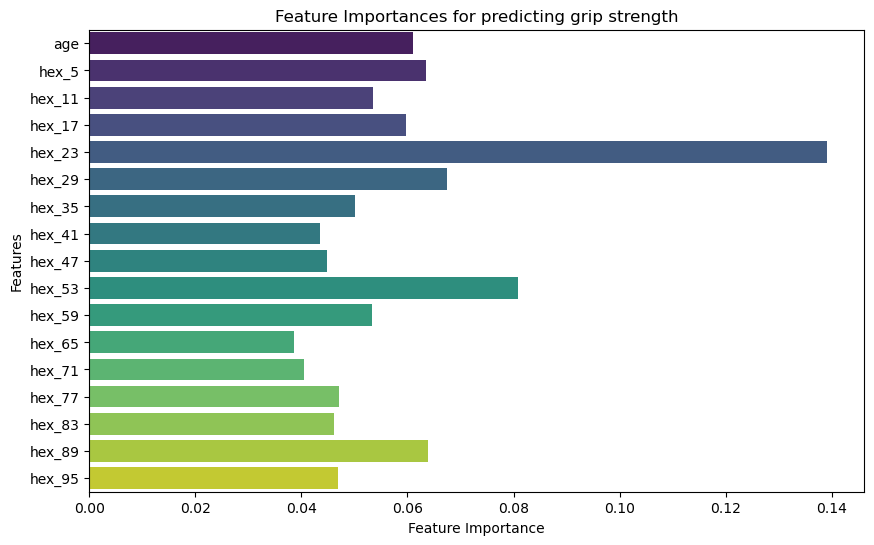

In [16]:
showFeatureImportances(X_orig)

In [17]:
female_df = combined_df[combined_df['female'] == 1]
male_df = combined_df[combined_df['female'] == 0]

male_df.head()

,age,female,grip,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
0,23.0,0,34.0,1.0,3,3,1,1,1,3,1,4.0,1.0,3,3.0,3.0,3,4,1
1,19.0,0,30.0,4.0,4,2,1,3,2,4,5,3.0,4.0,1,5.0,4.0,3,5,3
3,19.0,0,38.0,2.0,1,2,3,4,5,4,4,2.0,5.0,2,3.0,4.0,2,4,4
4,19.0,0,39.0,3.0,2,4,2,2,3,4,3,2.0,1.0,4,4.0,4.0,4,2,3
6,19.0,0,42.0,4.0,5,4,2,4,1,4,4,4.0,1.0,4,4.0,1.0,4,2,3


In [18]:
male_X = male_df.drop("grip", axis = 1)
male_X = male_X.drop("female", axis = 1)

male_y = male_df["grip"]

column_names = male_X.columns.tolist()

male_X = standardizeData(male_X)

male_X.columns = column_names

male_X.head()

,age,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
0,0.416667,0.00,0.50,0.50,0.00,0.00,0.00,0.50,0.00,0.75,0.00,0.50,0.50,0.50,0.50,0.75,0.00
1,0.083333,0.75,0.75,0.25,0.00,0.50,0.25,0.75,1.00,0.50,0.75,0.00,1.00,0.75,0.50,1.00,0.50
2,0.083333,0.25,0.00,0.25,0.50,0.75,1.00,0.75,0.75,0.25,1.00,0.25,0.50,0.75,0.25,0.75,0.75
3,0.083333,0.50,0.25,0.75,0.25,0.25,0.50,0.75,0.50,0.25,0.00,0.75,0.75,0.75,0.75,0.25,0.50
4,0.083333,0.75,1.00,0.75,0.25,0.75,0.00,0.75,0.75,0.75,0.00,0.75,0.75,0.00,0.75,0.25,0.50


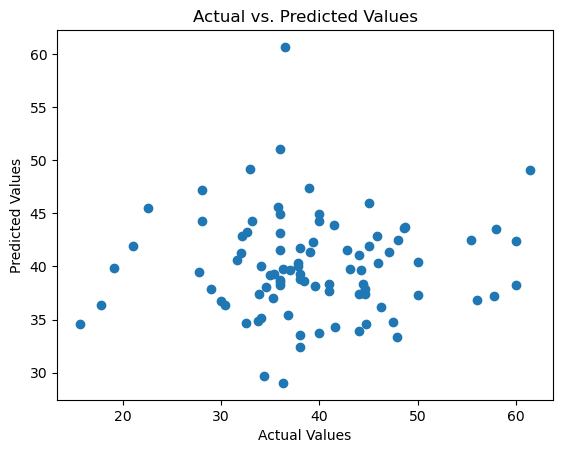

Mean Squared Error: 99.51324847056182
R-squared: -0.2452635415676634


In [19]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(male_X, male_y, test_size=0.2, random_state=42)


# Create the model
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model2.fit(X_train, y_train)

# Predict target with X_Test
y_pred = rf_model2.predict(X_test)


# Visualize results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


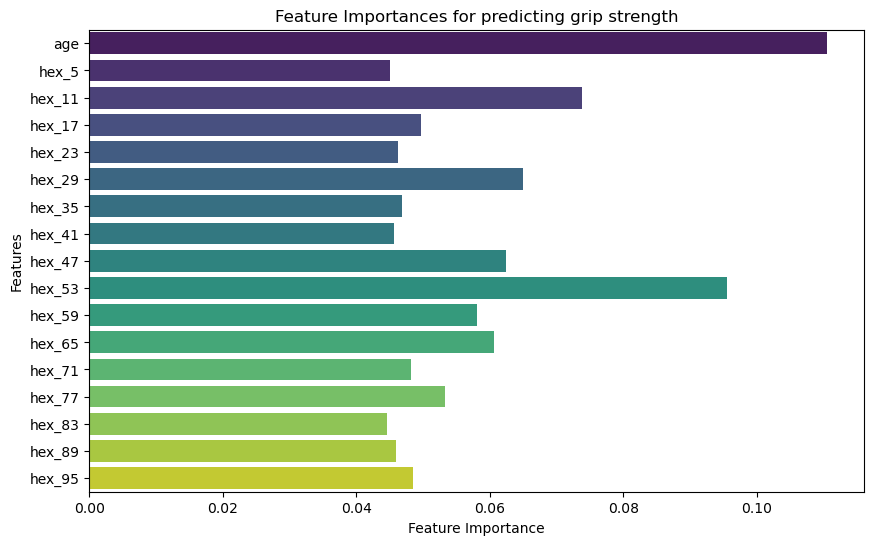

In [20]:
# Get feature importances
feature_importances2 = rf_model2.feature_importances_

# Get names of features
features2 = list(male_X.columns)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=list(features2), x=list(feature_importances2), orient='h', palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances for predicting grip strength')
plt.show()

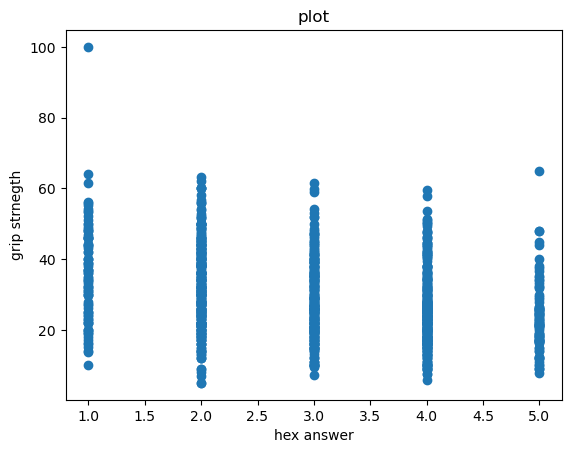

In [21]:
plt.scatter(combined_df["hex_53"], combined_df["grip"])
plt.xlabel('hex answer')
plt.ylabel('grip strnegth')
plt.title('plot')
plt.show()

In [22]:
female_X = female_df.drop("grip", axis = 1)
female_X = female_X.drop("female", axis = 1)

female_y = female_df["grip"]

column_names = female_X.columns.tolist()

female_X = standardizeData(female_X)

female_X.columns = column_names

female_X.head()

,age,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
0,0.00,0.75,1.00,0.75,1.00,0.75,0.25,0.25,1.00,0.00,0.25,0.75,1.00,0.25,0.75,0.00,0.00
1,0.05,0.25,0.75,0.75,0.75,0.50,0.25,0.75,0.75,0.25,0.00,0.75,0.75,0.75,0.75,0.50,0.25
2,0.10,0.75,1.00,1.00,1.00,0.00,0.00,0.25,1.00,0.75,0.50,1.00,1.00,0.00,0.75,0.00,0.00
3,0.05,0.25,0.00,0.50,0.75,0.75,1.00,0.75,0.50,0.25,1.00,0.75,0.75,0.75,0.75,0.75,0.25
4,0.15,0.25,0.75,0.75,0.75,0.00,0.75,0.25,0.50,0.75,0.25,0.75,1.00,0.50,0.75,0.25,0.50


In [23]:
male_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, 0 to 1014
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     445 non-null    float64
 1   female  445 non-null    int64  
 2   grip    445 non-null    float64
 3   hex_5   445 non-null    float64
 4   hex_11  445 non-null    int64  
 5   hex_17  445 non-null    int64  
 6   hex_23  445 non-null    int64  
 7   hex_29  445 non-null    int64  
 8   hex_35  445 non-null    int64  
 9   hex_41  445 non-null    int64  
 10  hex_47  445 non-null    int64  
 11  hex_53  445 non-null    float64
 12  hex_59  445 non-null    float64
 13  hex_65  445 non-null    int64  
 14  hex_71  445 non-null    float64
 15  hex_77  445 non-null    float64
 16  hex_83  445 non-null    int64  
 17  hex_89  445 non-null    int64  
 18  hex_95  445 non-null    int64  
dtypes: float64(7), int64(12)
memory usage: 69.5 KB


In [24]:
female_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 552 entries, 2 to 991
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     552 non-null    float64
 1   female  552 non-null    int64  
 2   grip    552 non-null    float64
 3   hex_5   552 non-null    float64
 4   hex_11  552 non-null    int64  
 5   hex_17  552 non-null    int64  
 6   hex_23  552 non-null    int64  
 7   hex_29  552 non-null    int64  
 8   hex_35  552 non-null    int64  
 9   hex_41  552 non-null    int64  
 10  hex_47  552 non-null    int64  
 11  hex_53  552 non-null    float64
 12  hex_59  552 non-null    float64
 13  hex_65  552 non-null    int64  
 14  hex_71  552 non-null    float64
 15  hex_77  552 non-null    float64
 16  hex_83  552 non-null    int64  
 17  hex_89  552 non-null    int64  
 18  hex_95  552 non-null    int64  
dtypes: float64(7), int64(12)
memory usage: 86.2 KB


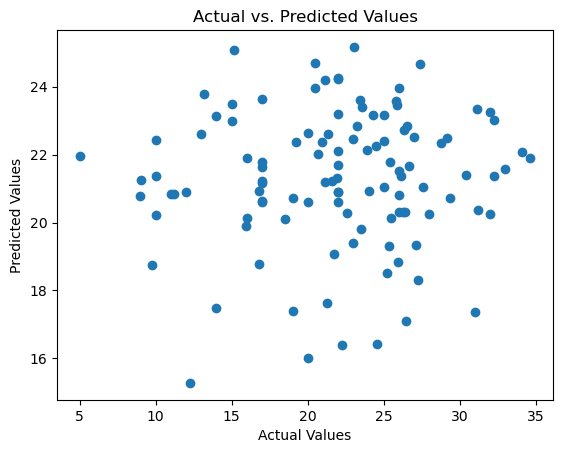

Mean Squared Error: 41.690333956576566
R-squared: -0.07659915269315554


In [25]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(female_X, female_y, test_size=0.2, random_state=42)


# Create the model
rf_model3 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model3.fit(X_train, y_train)

# Predict target with X_Test
y_pred = rf_model3.predict(X_test)


# Visualize results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

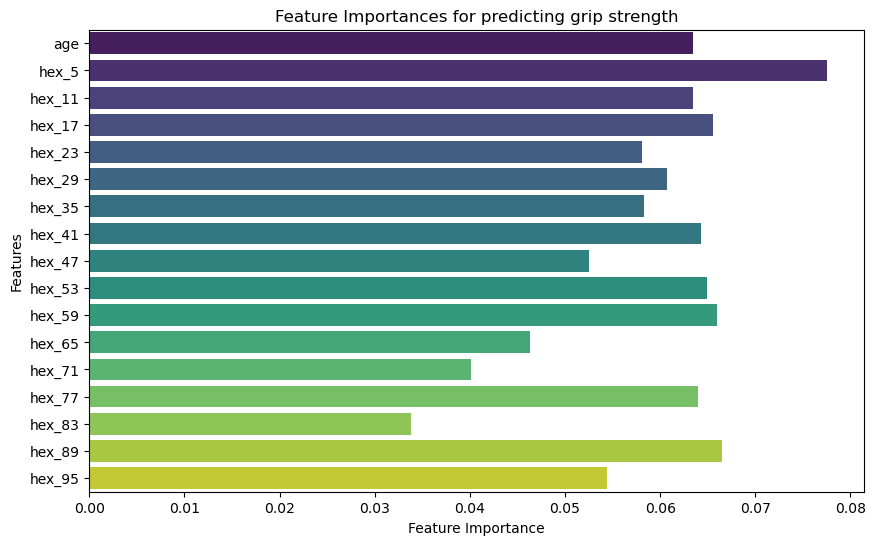

In [26]:
# Get feature importances
feature_importances3 = rf_model3.feature_importances_

# Get names of features
features3 = list(female_X.columns)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=list(features3), x=list(feature_importances3), orient='h', palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances for predicting grip strength')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(female_X, female_y, test_size=0.2, random_state=42)

# Define threshold values for low, medium, and high
low_threshold = 15  # Adjust as needed
high_threshold = 25  # Adjust as needed

# Create a new column 'Group' based on threshold values for training data
y_train_grouped = np.select(
    [y_train < low_threshold, 
     (y_train >= low_threshold) & (y_train <= high_threshold),
     y_train > high_threshold],
    ['Low', 'Medium', 'High'])

# Create the classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the grouped labels
rf_classifier.fit(X_train, y_train_grouped)

# Apply the same thresholding to the test set
y_test_grouped = np.select(
    [y_test < low_threshold, 
     (y_test >= low_threshold) & (y_test <= high_threshold),
     y_test > high_threshold],
    ['Low', 'Medium', 'High'])

# Predict target with X_Test
y_pred_grouped = rf_classifier.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test_grouped, y_pred_grouped)
conf_matrix = confusion_matrix(y_test_grouped, y_pred_grouped)
class_report = classification_report(y_test_grouped, y_pred_grouped)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.5135135135135135
Confusion Matrix:
[[ 5  1 32]
 [ 2  1 12]
 [ 7  0 51]]
Classification Report:
              precision    recall  f1-score   support

        High       0.36      0.13      0.19        38
         Low       0.50      0.07      0.12        15
      Medium       0.54      0.88      0.67        58

    accuracy                           0.51       111
   macro avg       0.46      0.36      0.33       111
weighted avg       0.47      0.51      0.43       111



In [28]:
female_df.describe()

,age,female,grip,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
count,552.000000,552.0,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,19.117754,1.0,21.329058,3.362319,4.177536,3.574275,3.411232,2.898551,2.867754,3.083333,3.869565,3.307971,2.985507,3.755435,4.210145,2.898551,4.349638,2.960145,2.884058
std,1.536811,0.0,6.462872,1.177170,0.904317,1.071792,1.163300,1.226092,1.345387,1.188394,0.888124,1.099121,1.319877,1.002704,0.895262,1.263992,0.754322,1.278840,1.328577
min,18.000000,1.0,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,1.0,17.000000,2.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,4.000000,2.000000,4.000000,2.000000,2.000000
50%,19.000000,1.0,21.785000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,19.000000,1.0,25.837500,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000
max,38.000000,1.0,50.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [59]:
from sklearn.preprocessing import StandardScaler

#set dataset to combined, male, or female
dataset = male_df


# Standardize the data (important for k-means)
myScaler = StandardScaler()

# Create a function to apply clustering and plot the results
def cluster_and_plot(x_column, y_column, title):
    data = dataset[[x_column, y_column]]
    data = data.drop("grip", axis = 1)

    standardized_data = myScaler.fit_transform(data)

    # Choose the number of clusters (k)
    k = 4  # You specified k=4

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    dataset['Cluster'] = kmeans.fit_predict(standardized_data)

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_column, y=y_column, hue='Cluster', data=dataset, palette='viridis', s=100)

    # Add labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(title)

    
    # Print mean grip strength for each cluster
    mean_grip_strength = dataset.groupby('Cluster')['grip'].mean()
    print(f"\nMean Grip Strength for each Cluster:\n{mean_grip_strength}")

    # Show the plot
    plt.show()


C:\Users\Badle\AppData\Local\Temp\ipykernel_17816\2780176933.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Fearfulness_Score'] = dataset[fearfulness_columns].sum(axis=1)
C:\Users\Badle\AppData\Local\Temp\ipykernel_17816\2780176933.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Anxiety_Score'] = dataset[anxiety_columns].sum(axis=1)
C:\Users\Badle\AppData\Local\Temp\ipykernel_17816\2780176933.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

C:\Users\Badle\MLClass\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Badle\MLClass\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Badle\AppData\Local\Temp\ipykernel_17816\2780176933.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cluster'] = kmeans.fit_predict(standardized_data)



Mean Grip Strength for each Cluster:
Cluster
0    39.625912
1    39.133000
2    37.075588
3    37.614783
Name: grip, dtype: float64


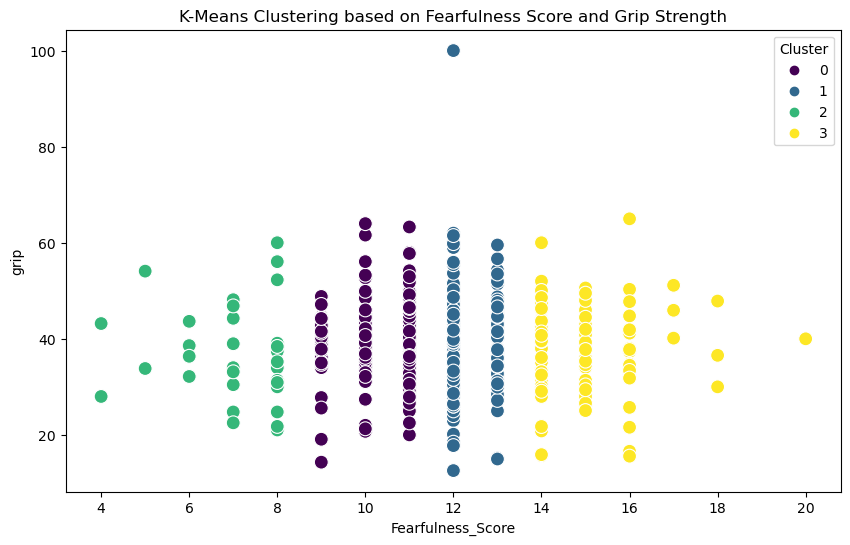

In [60]:
# Apply clustering and plot for each dimension
cluster_and_plot('Fearfulness_Score', 'grip', 'K-Means Clustering based on Fearfulness Score and Grip Strength')

C:\Users\Badle\MLClass\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Badle\MLClass\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Badle\AppData\Local\Temp\ipykernel_17816\2780176933.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cluster'] = kmeans.fit_predict(standardized_data)



Mean Grip Strength for each Cluster:
Cluster
0    38.518649
1    39.526854
2    40.910000
3    36.421154
Name: grip, dtype: float64


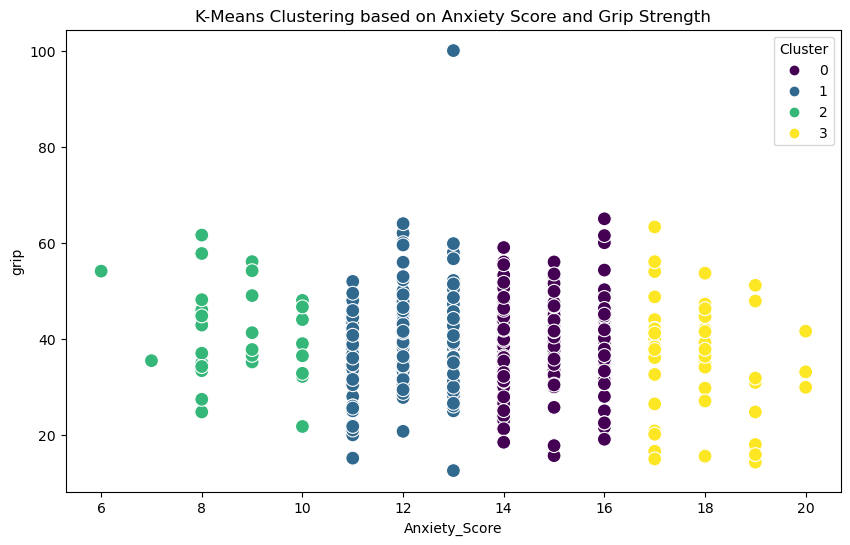

In [61]:
cluster_and_plot('Anxiety_Score', 'grip', 'K-Means Clustering based on Anxiety Score and Grip Strength')

C:\Users\Badle\MLClass\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Badle\MLClass\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Badle\AppData\Local\Temp\ipykernel_17816\2780176933.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cluster'] = kmeans.fit_predict(standardized_data)



Mean Grip Strength for each Cluster:
Cluster
0    40.859494
1    35.707586
2    38.766815
3    36.685347
Name: grip, dtype: float64


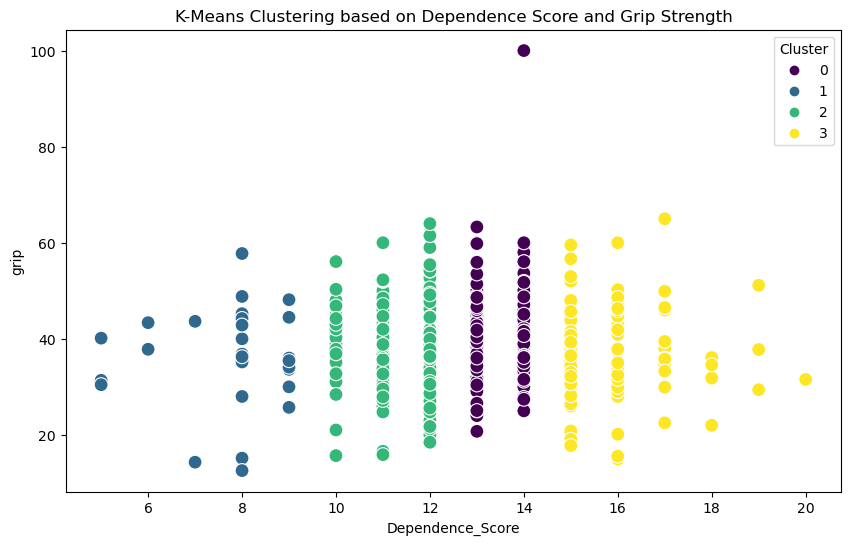

In [62]:
cluster_and_plot('Dependence_Score', 'grip', 'K-Means Clustering based on Dependence Score and Grip Strength')

C:\Users\Badle\MLClass\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Badle\MLClass\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Badle\AppData\Local\Temp\ipykernel_17816\2780176933.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cluster'] = kmeans.fit_predict(standardized_data)



Mean Grip Strength for each Cluster:
Cluster
0    37.623803
1    40.172955
2    39.349722
3    34.719259
Name: grip, dtype: float64


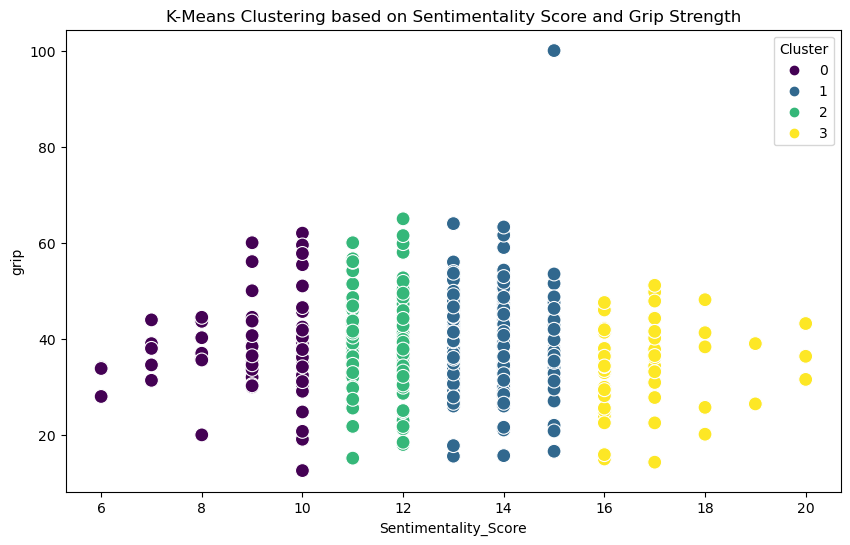

In [63]:
cluster_and_plot('Sentimentality_Score', 'grip', 'K-Means Clustering based on Sentimentality Score and Grip Strength')